## Training Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway,ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_rel

In [2]:
df_neurological = pd.read_excel("model_diagnosed_predictions_merged.xlsx")
print(df_neurological.head())

             id  sex        age   model_1a   model_2a   model_3a   model_1b  \
0  NDARAA306NT2    1  21.334702  20.088539  21.021658  21.115217  16.333345   
1  NDARAA536PTU    0  12.819986  13.234709  12.720736  12.923837  14.366821   
2  NDARAA947ZG5    0  13.748003  13.099492  13.663066  13.469153  12.335497   
3  NDARAA948VFH    1   7.993497   8.548469   7.617226   7.877032   8.628305   
4  NDARAB055BPR    1  11.023842  11.352570  11.248914  10.981045  11.789520   

    model_2b   model_3b   model_1c  ...  \
0  17.219666  18.351286  20.422647  ...   
1  13.965192  13.367447  12.745684  ...   
2  13.391402  15.173833  14.646384  ...   
3   7.713012   6.622183   8.977092  ...   
4  11.251471  13.601417  11.236694  ...   

   Diagnosis_ClinicianConsensus,DX_05_Sub  Diagnosis_ClinicianConsensus,DX_06  \
0                                     NaN                   Language Disorder   
1                                     NaN                                 NaN   
2                      

In [3]:
df_healthy = pd.read_excel("df_healthy_split.xlsx")
print(df_healthy.head())

             id  sex        age   model_1a   model_2a   model_3a   model_1b  \
0  NDARAB977GFB    1   8.603810   9.145094   8.035597   7.463906   8.140234   
1  NDARAC331VEH    0  14.285078  13.105409  14.186203  14.170991  13.944642   
2  NDARAD481FXF    0  17.137577  16.184971  17.112951  16.846466  16.626795   
3  NDARAE270LEZ    0  17.575975  17.680454  17.662128  17.318161  16.371716   
4  NDARAF440XWG    1   7.346908   6.616150   7.180307   7.344274   6.760066   

    model_2b   model_3b   model_1c   model_2c   model_3c   model_1d  \
0   8.082191   8.105371   8.570071   8.634348   8.496588   8.713488   
1  14.250213  13.461385  14.249879  14.192885  14.266623  14.140401   
2  16.063311  16.627272  16.973633  16.969097  17.294668  17.076149   
3  16.952188  16.900669  17.394253  17.471096  17.561028  17.257935   
4   6.691042   7.203934   7.341215   7.336468   7.217484   7.292258   

    model_2d   model_3d  split  
0   8.412777   8.573111      0  
1  14.581005  14.086846      0  

Filter out ONLY test cases from healthy df.

In [4]:
df_healthy_test = df_healthy[df_healthy.split == 2]
display(df_healthy_test)

,id,sex,age,model_1a,model_2a,model_3a,model_1b,model_2b,model_3b,model_1c,model_2c,model_3c,model_1d,model_2d,model_3d,split
16,NDARAU967RWU,1,11.289641,12.403775,11.287275,11.229621,12.379576,13.863669,11.847140,11.200108,11.263893,11.161130,11.121098,11.125907,11.205004,2
23,NDARBE123PWH,1,8.677846,7.389197,7.551539,8.711461,6.918924,6.719290,7.007655,8.602077,8.712778,8.571852,8.738508,8.547296,8.724609,2
27,NDARBN620TT7,1,15.281542,15.210082,14.215570,17.938656,15.761881,15.634199,16.997498,15.415129,15.181074,15.383447,15.041540,15.421821,15.168967,2
32,NDARBW268XPY,0,8.529545,6.880052,8.154312,8.314172,7.032804,7.653470,6.977312,8.563072,8.469488,8.427566,8.476601,8.374081,8.467093,2
34,NDARBZ913ZB9,0,10.257928,9.268641,10.351253,10.327284,8.940680,9.003501,10.576771,10.323015,10.236005,10.209805,10.339373,10.270968,10.076239,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,NDARYM695TZY,0,16.127310,16.012827,16.097246,16.043201,14.547579,14.414842,14.219914,16.239719,15.994396,16.155882,15.892655,16.104174,16.091789,2
524,NDARZF170TZ0,0,14.002966,13.216396,14.569895,13.662265,13.420505,15.415717,14.600708,13.957851,13.896666,14.039305,14.126167,13.919613,13.936327,2
533,NDARZM739MH6,1,11.123089,11.242104,10.851130,11.299730,10.274651,11.078980,9.856704,11.032362,11.069997,11.116201,11.160784,11.031754,11.159278,2
538,NDARZV421TCZ,0,12.089094,11.011962,12.031243,12.095448,10.222553,11.869387,11.416807,12.097712,12.031899,12.174921,12.181311,12.204139,12.121143,2


In [26]:
display(df_healthy_test.sort_values(by=['age'],ascending=False))

,id,sex,age,model_1a,model_2a,model_3a,model_1b,model_2b,model_3b,model_1c,model_2c,model_3c,model_1d,model_2d,model_3d,split
374,NDARTN760YH8,1,22.071412,18.183067,18.802568,17.245386,16.001907,16.319235,16.245016,21.946384,21.649143,21.826733,21.250570,21.592793,21.561626,2
225,NDARLB017MBJ,1,21.000684,20.703312,21.184973,20.853798,17.573889,18.074711,19.970184,20.961241,21.036953,21.201561,20.865696,21.081717,21.063377,2
274,NDARMV319CAT,0,20.489048,19.657253,20.537134,20.262865,16.520393,16.499683,16.625998,20.583920,20.480242,20.389299,20.355385,20.501177,20.613972,2
177,NDARJG740PM8,1,18.539698,17.721500,18.510925,18.248657,14.990428,16.150930,15.580801,18.560707,18.457201,18.413744,18.615925,18.541822,18.591024,2
489,NDARXU679ZE8,1,18.358658,17.705425,17.988188,18.057737,16.427732,15.999123,16.724535,18.270897,18.125114,18.303701,18.308393,18.306639,18.439049,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,NDAREW531JV9,0,6.161533,7.037432,6.481696,6.589601,6.711167,6.120631,6.814631,6.077980,6.169480,6.128717,6.213113,6.110516,6.218640,2
306,NDARNT898ZPF,1,5.964864,7.557081,7.339181,6.316850,7.643970,7.007505,6.335521,6.021514,6.089607,5.939081,6.258985,6.238770,5.975451,2
245,NDARLU606ZDD,0,5.813597,6.743293,6.300723,5.580248,7.254508,6.691130,5.122420,5.805596,5.837301,5.730145,5.895347,5.940856,5.844041,2
164,NDARHU910KZC,1,5.794889,6.399994,5.993409,5.702508,8.474161,7.461541,7.030850,5.793840,5.785749,5.746627,5.821714,5.828773,5.831561,2


In [5]:
df_healthy_test_mae = pd.DataFrame()
df_healthy_test_error = pd.DataFrame()
df_ndd_mae = pd.DataFrame()
df_ndd_error = pd.DataFrame()

df_healthy_test_mae['id'] = df_healthy_test['id']
df_healthy_test_mae['age'] = df_healthy_test['age']
df_healthy_test_mae['model_1b'] =  abs((df_healthy_test['model_1b'] - df_healthy_test['age']))/2
df_healthy_test_mae['model_2b'] = abs((df_healthy_test['model_2b'] - df_healthy_test['age']))/2
df_healthy_test_mae['model_3b'] = abs((df_healthy_test['model_3b'] - df_healthy_test['age']))/2

df_healthy_test_error['id'] = df_healthy_test['id']
df_healthy_test_error['age'] = df_healthy_test['age']
df_healthy_test_error['model_1b'] = df_healthy_test['model_1b'] - df_healthy_test['age']
df_healthy_test_error['model_2b'] = df_healthy_test['model_2b'] - df_healthy_test['age']
df_healthy_test_error['model_3b'] = df_healthy_test['model_3b'] - df_healthy_test['age']

df_ndd_error['id'] = df_neurological['id']
df_ndd_error['age'] = df_neurological['age']
df_ndd_error['model_1b'] = df_neurological['model_1b'] - df_neurological['age']
df_ndd_error['model_2b'] = df_neurological['model_2b'] - df_neurological['age']
df_ndd_error['model_3b'] = df_neurological['model_3b'] - df_neurological['age']

In [6]:
print(df_healthy_test_mae)

               id        age  model_1b  model_2b  model_3b
16   NDARAU967RWU  11.289641  0.544967  1.287014  0.278750
23   NDARBE123PWH   8.677846  0.879461  0.979278  0.835095
27   NDARBN620TT7  15.281542  0.240169  0.176329  0.857978
32   NDARBW268XPY   8.529545  0.748370  0.438038  0.776117
34   NDARBZ913ZB9  10.257928  0.658624  0.627214  0.159421
..            ...        ...       ...       ...       ...
511  NDARYM695TZY  16.127310  0.789866  0.856234  0.953698
524  NDARZF170TZ0  14.002966  0.291231  0.706376  0.298871
533  NDARZM739MH6  11.123089  0.424219  0.022054  0.633193
538  NDARZV421TCZ  12.089094  0.933270  0.109854  0.336143
541  NDARZW363UGM  12.595710  0.311719  0.162813  0.251825

[82 rows x 5 columns]


### PART-A: Accuracy on Healthy Cases (T-test between MAEs)

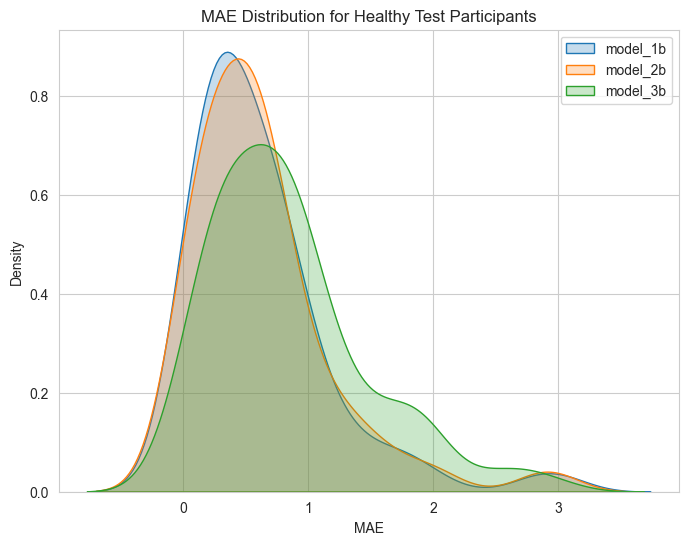

In [7]:
models_to_compare = ["model_1b", "model_2b", "model_3b"]

def plot_error_comparison(df_healthy_test_mae, title):
    plt.figure(figsize=(8, 6))

    for model in models_to_compare:
        sns.kdeplot(df_healthy_test_mae[model], label=model, shade=True, zorder=2)

    plt.title(title)
    plt.xlabel('MAE')
    plt.ylabel('Density')
    x_ticks = range(0, int(max(max(df_healthy_test_mae[model]) for model in models_to_compare)) + 1)
    plt.xticks(x_ticks, x_ticks)

    plt.legend()
    plt.show()

plot_error_comparison(df_healthy_test_mae, "MAE Distribution for Healthy Test Participants")

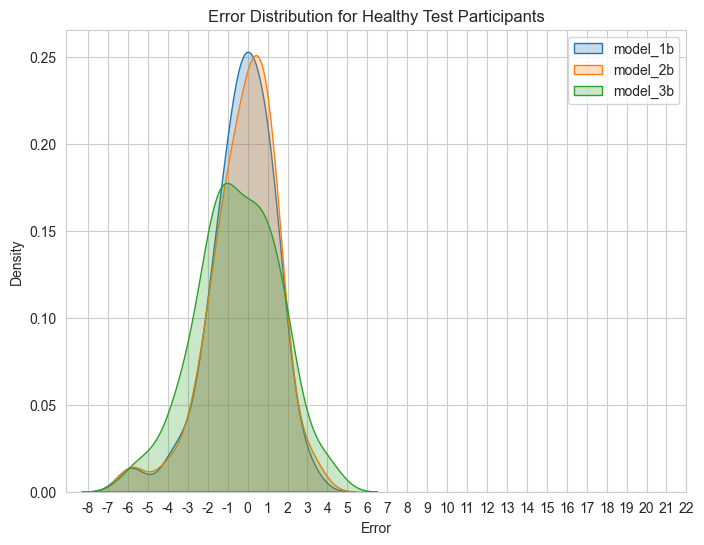

In [20]:
models_to_compare = ["model_1b", "model_2b", "model_3b"]


def plot_error_comparison(df_healthy_test_error, title):
    plt.figure(figsize=(8, 6))

    for model in models_to_compare:
        sns.kdeplot(df_healthy_test_error[model], label=model, shade=True, zorder=2)

    plt.title(title)
    plt.xlabel('Error')
    plt.ylabel('Density')
    #x_ticks = range(0, int(max(max(df_healthy_test_error[model]) for model in models_to_compare)) + 1)
    plt.xticks(x_ticks, x_ticks)

    plt.legend()
    plt.show()

plot_error_comparison(df_healthy_test_error, "Error Distribution for Healthy Test Participants")

#### Paired T-tests

##### Null Hypothesis (H0): There is no significant difference between the model MAE for healthy participants.
##### Alternative Hypothesis (H1): There is a significant difference between the model MAE for healthy participants.

In [8]:
#between model_1b and model_2b
ttest_rel(df_healthy_test_mae['model_1b'], df_healthy_test_mae['model_2b'])

TtestResult(statistic=-0.42721169669224907, pvalue=0.6703586440905871, df=81)

##### For models 1b and 2b, we cannot reject our H0. No difference in model MAEs.

In [9]:
#between model_2b and model_3b
ttest_rel(df_healthy_test_mae['model_2b'], df_healthy_test_mae['model_3b'])

TtestResult(statistic=-3.1365620490111774, pvalue=0.0023829729688210574, df=81)

##### For models 2b and 3b, we reject our H0. There is a difference in model MAEs.

In [10]:
#between model_1b and model_3b
ttest_rel(df_healthy_test_mae['model_1b'], df_healthy_test_mae['model_3b'])

TtestResult(statistic=-3.558291406240999, pvalue=0.0006274528432044308, df=81)

##### For models 1b and 3b, we reject our H0. There is a difference in model MAEs.

#####################################

### PART-B: Which model is able to differentiate between HC and NDD?

#### 1. Direct compare actual age and predicted age (healthy).

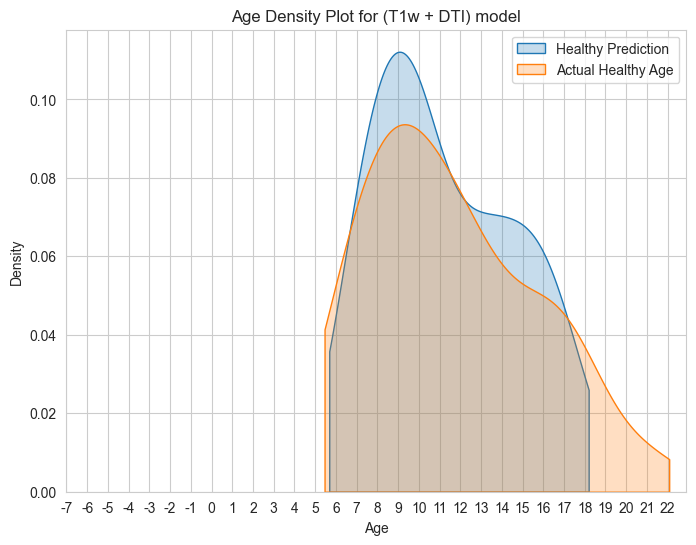

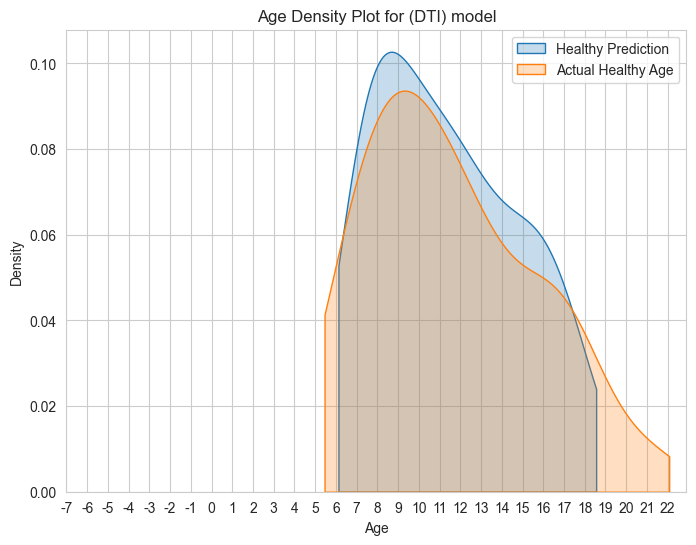

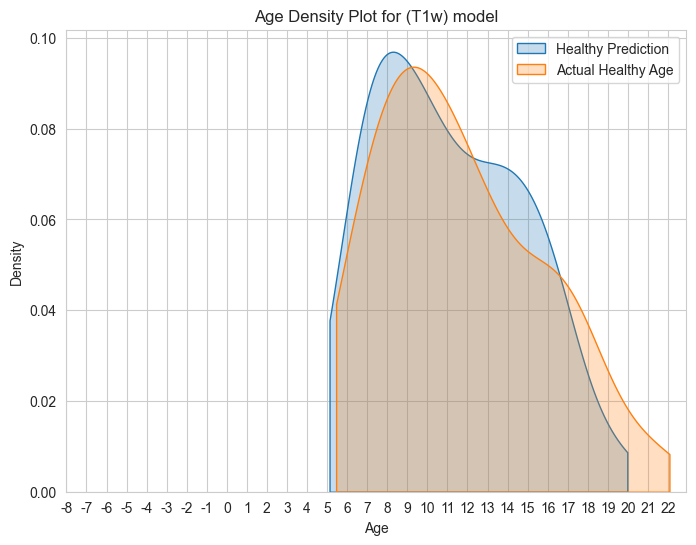

In [30]:
models = ['model_1b', 'model_2b', 'model_3b']
model_key = {'model_1b':'(T1w + DTI)', 'model_2b':'(DTI)', 'model_3b':'(T1w)'}
for model in models:
    plt.figure(figsize=(8, 6))

    sns.kdeplot(df_healthy_test[f'{model}'], label='Healthy Prediction', shade=True, zorder=2, cut=0)
    sns.kdeplot(df_healthy_test['age'], label='Actual Healthy Age', shade=True, zorder=2, cut=0)

    plt.title(f'Age Density Plot for {model_key[model]} model')
    plt.xlabel('Age')
    plt.ylabel('Density')
    x_ticks = range(int(min(min(df_healthy_test[model]), min(df_ndd_error[model]))),
                    int(max(max(df_healthy_test['age']), max(df_ndd_error[model])) + 1))
    plt.xticks(x_ticks, x_ticks)
    plt.legend()
    plt.show()

#### Paired T-tests

In [31]:
#model_1b and age
ttest_rel(df_healthy_test['model_1b'], df_healthy_test['age'])

TtestResult(statistic=-1.656134040833664, pvalue=0.10156389470880871, df=81)

In [32]:
#model_2b and age
ttest_rel(df_healthy_test['model_2b'], df_healthy_test['age'])

TtestResult(statistic=-1.234265466345537, pvalue=0.22067297542107656, df=81)

In [33]:
#model_3b and age
ttest_rel(df_healthy_test['model_3b'], df_healthy_test['age'])

TtestResult(statistic=-2.320056792199296, pvalue=0.02285530693111039, df=81)

##### All the p-values suggest we cannot reject H0. Therefore, there is no significant different between actual age and the predictions.

#### 2. Direct compare actual age and predicted age (NDD).

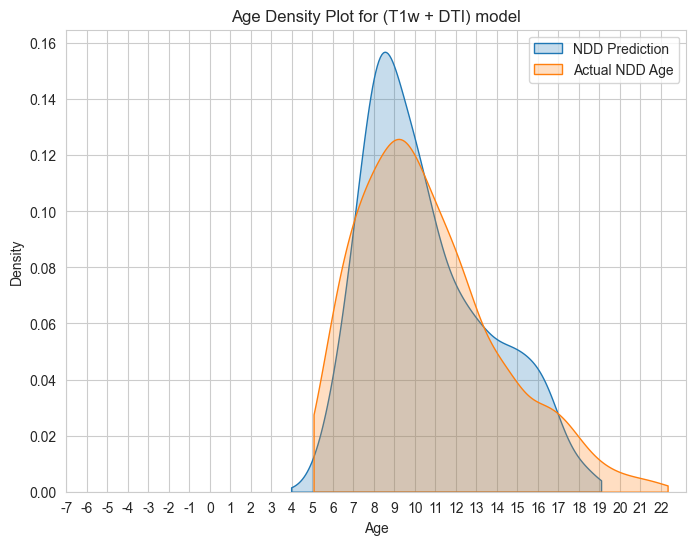

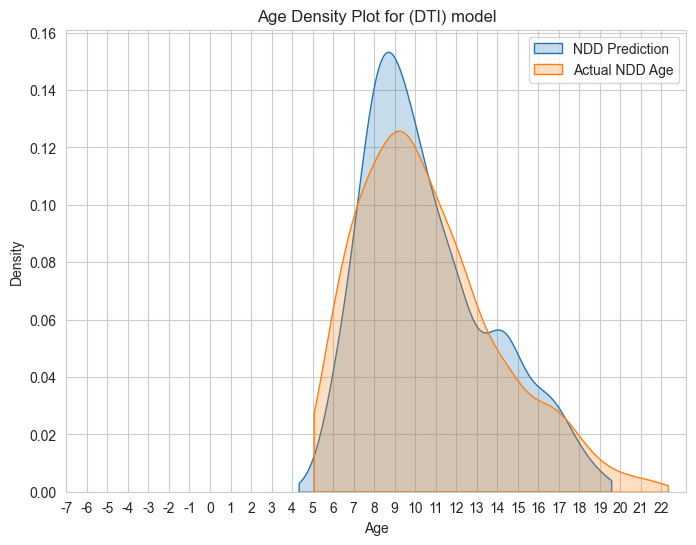

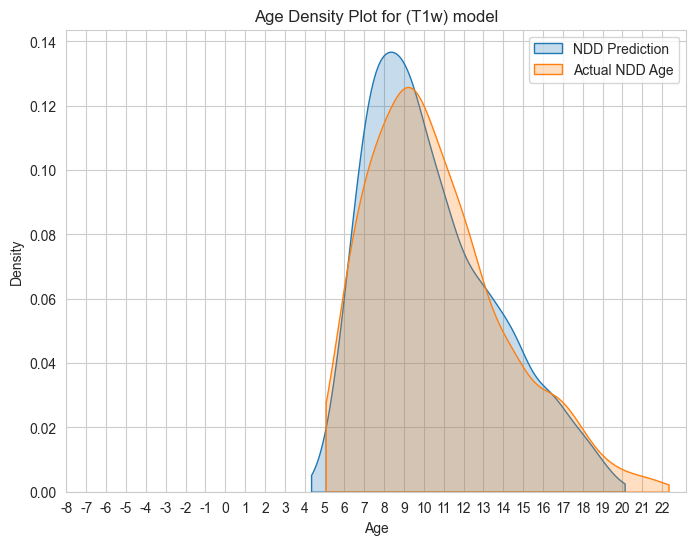

In [34]:
models = ['model_1b', 'model_2b', 'model_3b']

for model in models:
    plt.figure(figsize=(8, 6))

    sns.kdeplot(df_neurological[f'{model}'], label='NDD Prediction', shade=True, zorder=2, cut=0)
    sns.kdeplot(df_neurological['age'], label='Actual NDD Age', shade=True, zorder=2, cut=0)

    plt.title(f'Age Density Plot for {model_key[model]} model')
    plt.xlabel('Age')
    plt.ylabel('Density')
    x_ticks = range(int(min(min(df_neurological[model]), min(df_ndd_error[model]))),
                    int(max(max(df_neurological['age']), max(df_ndd_error[model])) + 1))
    plt.xticks(x_ticks, x_ticks)
    plt.legend()
    plt.show()


#### Paired T-tests

In [35]:
#model_1b and age
ttest_rel(df_neurological['model_1b'], df_neurological['age'])

TtestResult(statistic=-1.8943323455222745, pvalue=0.05841665212555343, df=1223)

In [36]:
#model_2b and age
ttest_rel(df_neurological['model_2b'], df_neurological['age'])

TtestResult(statistic=-0.5067886959899929, pvalue=0.6123944436961515, df=1223)

In [38]:
#model_3b and age
ttest_rel(df_neurological['model_3b'], df_neurological['age'])

TtestResult(statistic=-3.8977966549306564, pvalue=0.00010233879868841533, df=1223)

##### P-value for model_1b and model_3b are 0.05 or less. Therefore, we reject H0 for these models. Their actual age and predicted ages are significantly different.
##### This is not true for model_2b.

### PART-C: Comparison between Healthy predictions and Neurodevelopmental disorder predictions

#### 1. Healthy(test) vs NDD(all) [no age matching]

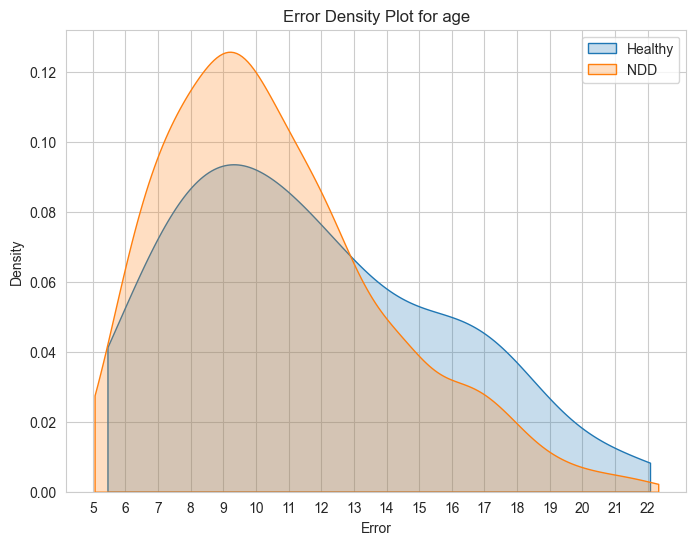

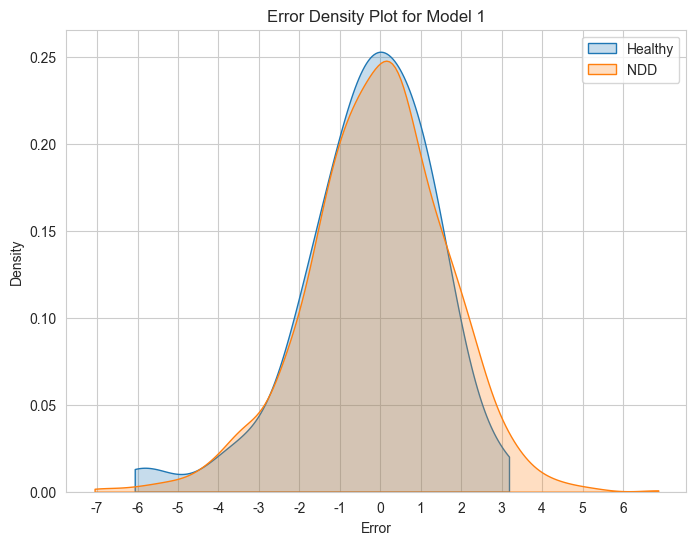

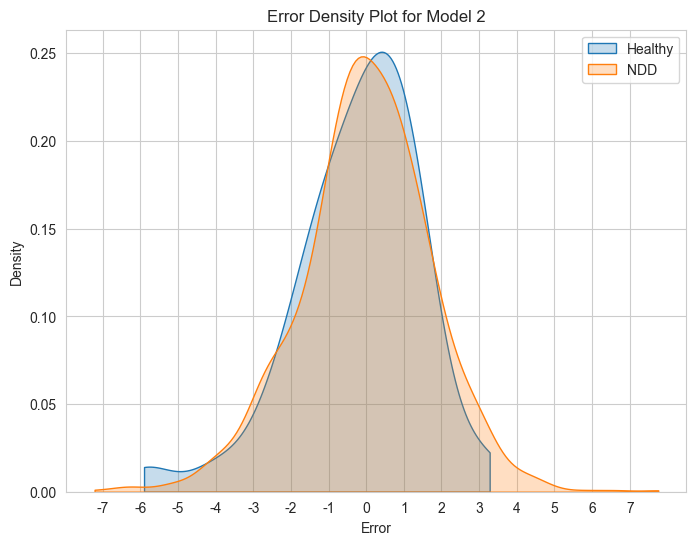

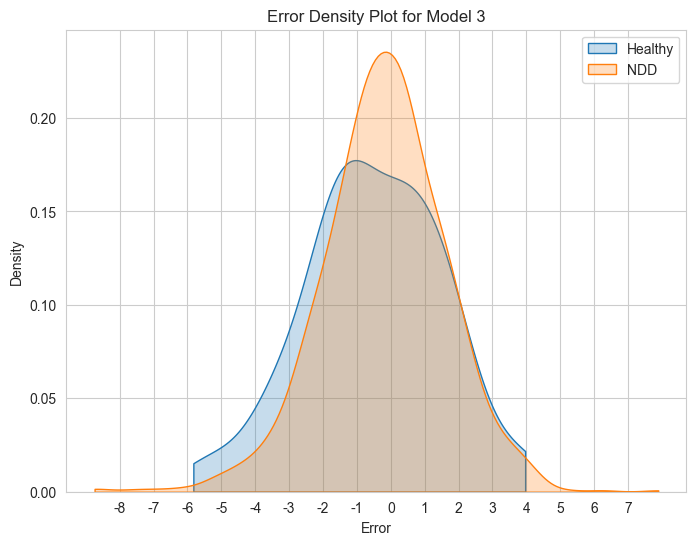

In [50]:
models = ['age', 'model_1b', 'model_2b', 'model_3b']
model_name = {'age':'age', 'model_1b':'Model 1', 'model_2b':'Model 2', 'model_3b':'Model 3'}

for model in models:
    plt.figure(figsize=(8, 6))

    sns.kdeplot(df_healthy_test_error[f'{model}'], label='Healthy', shade=True, zorder=2, cut=0)
    sns.kdeplot(df_ndd_error[f'{model}'], label='NDD', shade=True, zorder=2, cut=0)

    plt.title(f'Error Density Plot for {model_name[model]}')
    plt.xlabel('Error')
    plt.ylabel('Density')
    x_ticks = range(int(min(min(df_healthy_test_error[model]), min(df_ndd_error[model]))),
                    int(max(max(df_healthy_test_error[model]), max(df_ndd_error[model])) + 1))
    plt.xticks(x_ticks, x_ticks)
    plt.legend()
    plt.show()

#first plot is comparison between actual age and is not the error

#### Welsh's T-test

##### Check for equal variance assumption using levene test.
##### (Levene's test is a statistical test that can be used to assess the equality of variances.)

In [20]:
from scipy.stats import levene

statistic, p_value = levene(df_healthy_test_error['model_1b'], df_ndd_error['model_1b'])

if p_value > 0.05:
    print("Variances are approximately equal.")
else:
    print("Variances are significantly different.")

Variances are approximately equal.


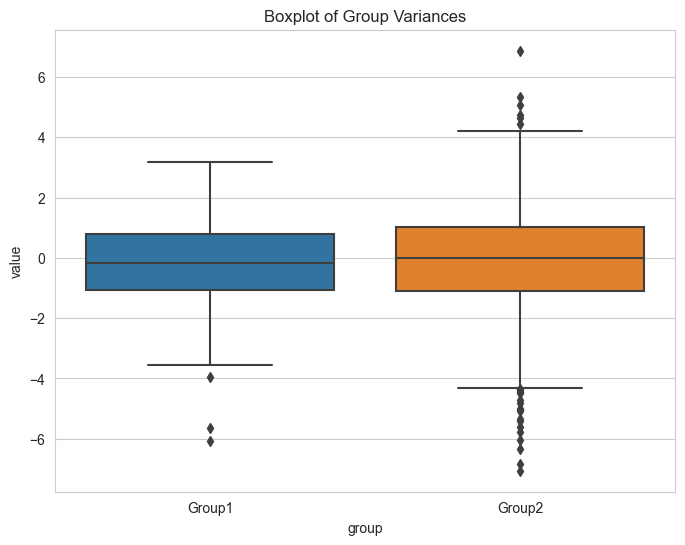

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x="group", y="value", data=pd.concat([pd.DataFrame({'group': 'Group1', 'value': df_healthy_test_error['model_1b']}),
                                                  pd.DataFrame({'group': 'Group2', 'value': df_ndd_error['model_1b']})]))
plt.title("Boxplot of Group Variances")
plt.show()


##### Null Hypothesis (H0): There is no significant difference between the model errors for healthy and neurological participants.
##### Alternative Hypothesis (H1): There is a significant difference between the model errors for healthy and neurological participants.

In [41]:
#t-test age
ttest_ind(df_healthy_test_error['age'], df_ndd_error['age'], equal_var=False)

TtestResult(statistic=2.1714619653115306, pvalue=0.0325618603552918, df=88.82031745278003)

In [42]:
#t-test model_1b
ttest_ind(df_healthy_test_error['model_1b'], df_ndd_error['model_1b'], equal_var=False)

TtestResult(statistic=-1.103952292612057, pvalue=0.2724541869197366, df=93.25801673671637)

In [43]:
#t-test model_2b
ttest_ind(df_healthy_test_error['model_2b'], df_ndd_error['model_2b'], equal_var=False)

TtestResult(statistic=-1.0607476063417303, pvalue=0.2915500782100463, df=93.05301673818055)

In [44]:
#t-test model_3b
ttest_ind(df_healthy_test_error['model_3b'], df_ndd_error['model_3b'], equal_var=False)

TtestResult(statistic=-1.3735453861768978, pvalue=0.17299302867489827, df=90.04487652795252)

##### T-test shows that the ages between the participants from healthy group and NDD group are significantly different.
##### Interestingly, we cannot reject H0 for any of the t-tests for the models. The actual error(prediction - actual) is not significantly different between the healthy test predictions and NDD predictions made by same model.

#### 2. Healthy(test) vs NDD(all) [bin matching]

In [45]:
bin_size = 1

max_age = max(df_healthy_test_error['age'].max(), df_ndd_error['age'].max())
age_bins = list(range(0, int(max_age) + bin_size, bin_size))
age_labels = [f"{start}-{start+bin_size}" for start in age_bins[:-1]]

healthy_balanced = pd.DataFrame()
neuro_balanced = pd.DataFrame()

for label, bin_start in zip(age_labels, age_bins[:-1]):

    healthy_bin_data = df_healthy_test_error[(df_healthy_test_error['age'] >= bin_start) & (df_healthy_test_error['age'] < bin_start + bin_size)]
    neuro_bin_data = df_ndd_error[(df_ndd_error['age'] >= bin_start) & (df_ndd_error['age'] < bin_start + bin_size)]

    min_bin_size = min(len(healthy_bin_data), len(neuro_bin_data))

    healthy_bin_data = healthy_bin_data.sample(min_bin_size, replace=False, random_state=42)
    neuro_bin_data = neuro_bin_data.sample(min_bin_size, replace=False, random_state=42)

    healthy_bin_data['age_category'] = label
    neuro_bin_data['age_category'] = label

    healthy_balanced = pd.concat([healthy_balanced, healthy_bin_data])
    neuro_balanced = pd.concat([neuro_balanced, neuro_bin_data])

In [46]:
display(healthy_balanced)

,id,age,model_1b,model_2b,model_3b,age_category
164,NDARHU910KZC,5.794889,2.679272,1.666652,1.235961,5-6
306,NDARNT898ZPF,5.964864,1.679106,1.042641,0.370657,5-6
160,NDARHP924ZHW,5.450376,2.226546,3.279365,1.726435,5-6
245,NDARLU606ZDD,5.813597,1.440911,0.877533,-0.691177,5-6
105,NDAREW531JV9,6.161533,0.549634,-0.040902,0.653098,6-7
...,...,...,...,...,...,...
85,NDAREC182WW2,18.285078,-0.652504,0.263777,-1.873867,18-19
177,NDARJG740PM8,18.539698,-3.549270,-2.388768,-2.958897,18-19
489,NDARXU679ZE8,18.358658,-1.930926,-2.359535,-1.634123,18-19
274,NDARMV319CAT,20.489048,-3.968655,-3.989365,-3.863050,20-21


In [47]:
display(neuro_balanced)

,id,age,model_1b,model_2b,model_3b,age_category
419,NDARHG906MEZ,5.948094,1.507325,2.953713,1.872071,5-6
1067,NDARWZ346RV4,5.627766,2.933462,1.973770,2.748753,5-6
1061,NDARWV938NKD,5.526694,-0.265040,0.446701,0.654179,5-6
306,NDARFM645RH5,5.351243,-0.308688,0.485111,0.981886,5-6
415,NDARHG188YE9,6.495436,1.098691,0.628071,-0.277192,6-7
...,...,...,...,...,...,...
1201,NDARZK753WGR,18.810289,-3.994587,-4.329135,-2.389436,18-19
1144,NDARYK042VMG,18.021902,0.061735,-0.161892,-1.266582,18-19
33,NDARAP457WB5,18.588751,-2.183514,-2.561863,-0.816078,18-19
253,NDAREP505XAD,20.171115,-3.641399,-4.545289,-2.426828,20-21


In [48]:
healthy_bin_counts = healthy_balanced['age_category'].value_counts().sort_index()
neuro_bin_counts = neuro_balanced['age_category'].value_counts().sort_index()

for label, count_healthy, count_neuro in zip(age_labels, healthy_bin_counts, neuro_bin_counts):
    print(f'Age Bin: {label}, Healthy Samples: {count_healthy}, Neuro Samples: {count_neuro}')


Age Bin: 0-1, Healthy Samples: 9, Neuro Samples: 9
Age Bin: 1-2, Healthy Samples: 6, Neuro Samples: 6
Age Bin: 2-3, Healthy Samples: 7, Neuro Samples: 7
Age Bin: 3-4, Healthy Samples: 5, Neuro Samples: 5
Age Bin: 4-5, Healthy Samples: 3, Neuro Samples: 3
Age Bin: 5-6, Healthy Samples: 2, Neuro Samples: 2
Age Bin: 6-7, Healthy Samples: 7, Neuro Samples: 7
Age Bin: 7-8, Healthy Samples: 4, Neuro Samples: 4
Age Bin: 8-9, Healthy Samples: 3, Neuro Samples: 3
Age Bin: 9-10, Healthy Samples: 1, Neuro Samples: 1
Age Bin: 10-11, Healthy Samples: 1, Neuro Samples: 1
Age Bin: 11-12, Healthy Samples: 4, Neuro Samples: 4
Age Bin: 12-13, Healthy Samples: 7, Neuro Samples: 7
Age Bin: 13-14, Healthy Samples: 4, Neuro Samples: 4
Age Bin: 14-15, Healthy Samples: 12, Neuro Samples: 12
Age Bin: 15-16, Healthy Samples: 6, Neuro Samples: 6


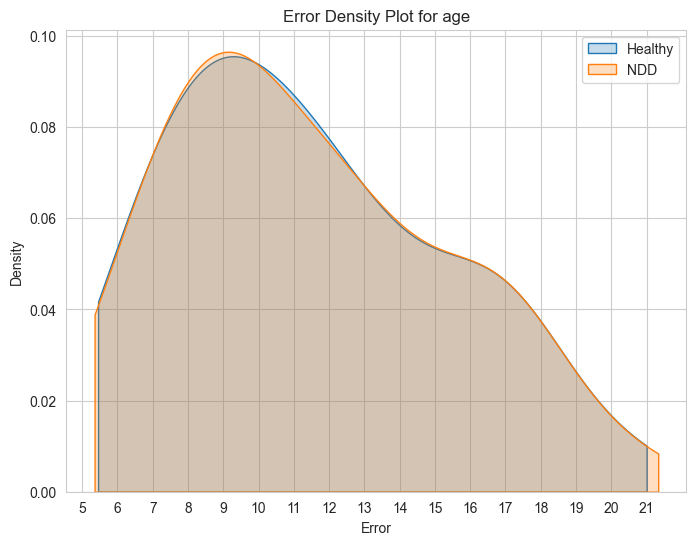

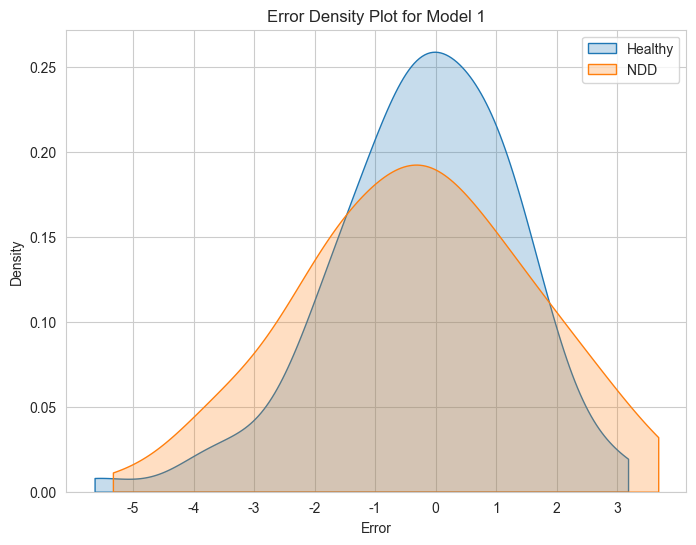

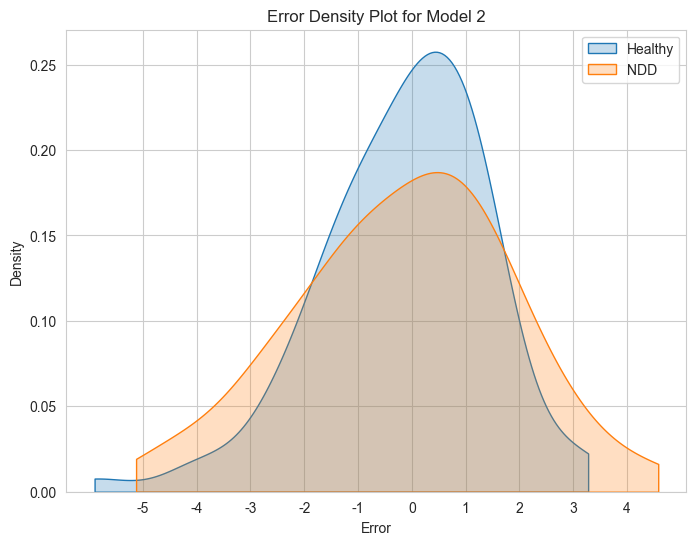

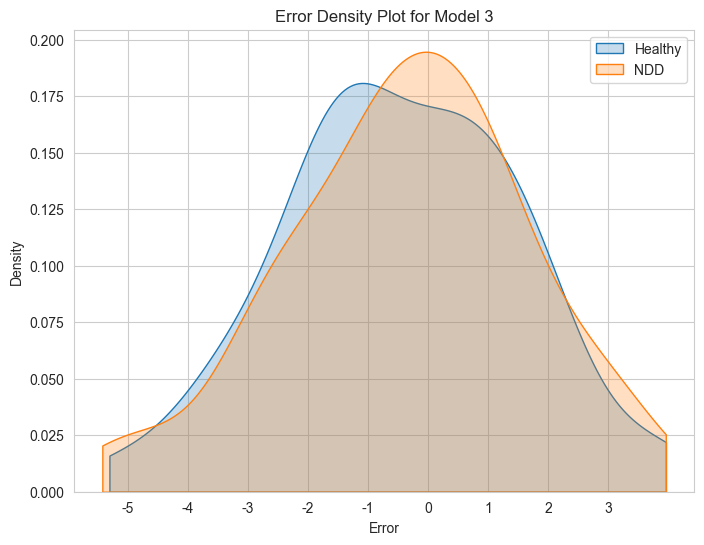

In [49]:
models = ['age', 'model_1b', 'model_2b', 'model_3b']
model_name = {'age':'age', 'model_1b':'Model 1', 'model_2b':'Model 2', 'model_3b':'Model 3'}

for model in models:
    plt.figure(figsize=(8, 6))

    sns.kdeplot(healthy_balanced[f'{model}'], label='Healthy', shade=True, zorder=2, cut=0)
    sns.kdeplot(neuro_balanced[f'{model}'], label='NDD', shade=True, zorder=2, cut=0)

    plt.title(f'Error Density Plot for {model_name[model]}')
    plt.xlabel('Error')
    plt.ylabel('Density')
    x_ticks = range(int(min(min(healthy_balanced[model]), min(neuro_balanced[model]))),
                    int(max(max(healthy_balanced[model]), max(neuro_balanced[model])) + 1))
    plt.xticks(x_ticks, x_ticks)
    plt.legend()
    plt.show()

#first plot is comparison between actual age and is not the error

#### Welsh T-test

##### Check for equal variance assumption using levene test.
##### (Levene’s test is a statistical test that can be used to assess the equality of variances.)

In [31]:
statistic, p_value = levene(healthy_balanced['age'], neuro_balanced['age'])

if p_value > 0.05:
    print("Variances are approximately equal.")
else:
    print("Variances are significantly different.")

Variances are approximately equal.


##### Null Hypothesis (H0): There is no significant difference between the model errors for healthy and neurological participants.
##### Alternative Hypothesis (H1): There is a significant difference between the model errors for healthy and neurological participants.

In [32]:
#t-test age
ttest_ind(healthy_balanced['age'], neuro_balanced['age'], equal_var=False)

TtestResult(statistic=-0.005507490197506658, pvalue=0.995612541698832, df=159.9994222191717)

In [33]:
#t-test model_1b
ttest_ind(healthy_balanced['model_1b'], neuro_balanced['model_1b'], equal_var=False)

TtestResult(statistic=0.43318368603667284, pvalue=0.6654934647950423, df=152.48481019640823)

In [34]:
#t-test model_2b
ttest_ind(healthy_balanced['model_2b'], neuro_balanced['model_2b'], equal_var=False)

TtestResult(statistic=-0.010702625736434846, pvalue=0.9914747900809995, df=151.4322860900241)

In [35]:
#t-test model_3b
ttest_ind(healthy_balanced['model_3b'], neuro_balanced['model_3b'], equal_var=False)

TtestResult(statistic=-0.2834041417583865, pvalue=0.7772336138797279, df=159.91469826536922)

##### For all the t-tests, we cannot reject H0. Therefore, there is no significant difference in error between healthy and NDD for the same model.

#### PART-D: Threshold on absolute error for all models

In [36]:
df_all_merged = pd.DataFrame()

df_healthy_test_error['type'] = 0 #healthy
df_ndd_error['type'] = 1 #ndd

# Concatenate the dataframes
df_all_merged = pd.concat([df_healthy_test_error, df_ndd_error], ignore_index=True)

In [37]:
#for actual value ROC

#df_all_merged = pd.DataFrame()

#df_healthy_test['type'] = 0 #healthy
#df_neurological['type'] = 1 #ndd

# Concatenate the dataframes
#df_all_merged = pd.concat([df_healthy_test, df_neurological], ignore_index=True)

In [40]:
display(df_all_merged)

,id,age,model_1b,model_2b,model_3b,type
0,NDARAU967RWU,11.289641,1.089935,2.574028,0.557499,0
1,NDARBE123PWH,8.677846,-1.758922,-1.958556,-1.670191,0
2,NDARBN620TT7,15.281542,0.480339,0.352657,1.715956,0
3,NDARBW268XPY,8.529545,-1.496741,-0.876075,-1.552233,0
4,NDARBZ913ZB9,10.257928,-1.317248,-1.254427,0.318843,0
...,...,...,...,...,...,...
1301,NDARZW472CCF,9.693246,-0.707683,-0.080977,-0.620934,1
1302,NDARZW619BDL,10.197467,-0.716419,-1.454174,-2.553480,1
1303,NDARZY101JNB,7.574834,0.586125,-0.061091,-0.251647,1
1304,NDARZZ740MLM,6.701232,1.739524,2.006077,0.557299,1


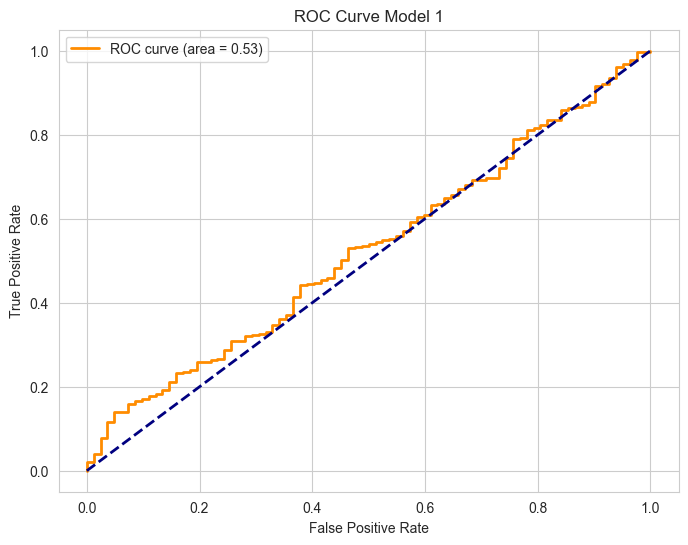

In [38]:
#model_1b

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(df_all_merged['type'], df_all_merged['model_1b'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Model 1')
plt.legend()
plt.show()


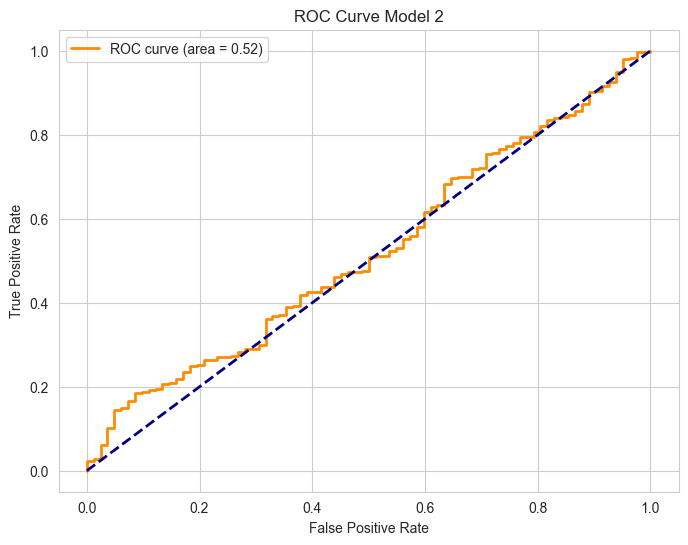

In [39]:
#model_2b

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(df_all_merged['type'], df_all_merged['model_2b'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Model 2')
plt.legend()
plt.show()


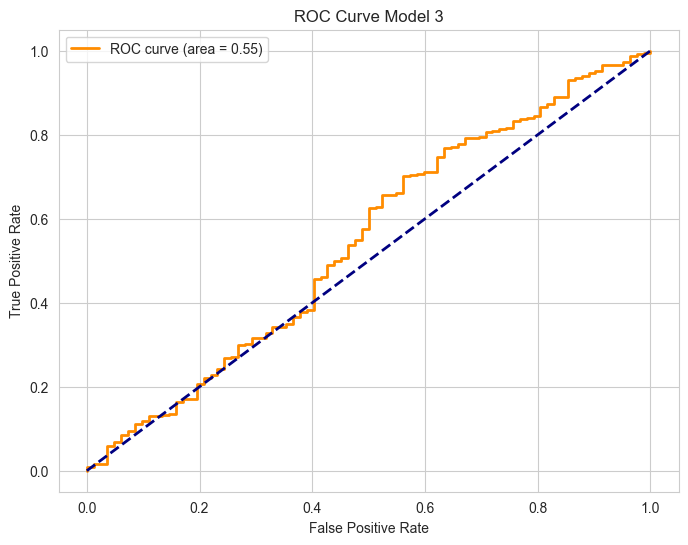

In [40]:
#model_3b

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(df_all_merged['type'], df_all_merged['model_3b'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Model 3')
plt.legend()
plt.show()


#### PART-E: ADHD Analysis (actual age vs prediction age)

In [42]:
df_adhd = pd.DataFrame(columns=df_neurological.columns)
df_autism = pd.DataFrame(columns=df_neurological.columns)

for index, row in df_neurological.iterrows():
    if any("Autism Spectrum Disorder" == str(row[col]) for col in df_neurological.columns):
        df_autism = df_autism.append(row, ignore_index=True)
    else:
        df_adhd = df_adhd.append(row, ignore_index=True)


df_adhd_error = pd.DataFrame()
df_adhd_error['id'] = df_adhd['id']
df_adhd_error['age'] = df_adhd['age']
df_adhd_error['model_1b'] = df_adhd['model_1b'] - df_adhd['age']
df_adhd_error['model_2b'] = df_adhd['model_2b'] - df_adhd['age']
df_adhd_error['model_3b'] = df_adhd['model_3b'] - df_adhd['age']


/var/folders/6n/8415mhqd08zdsytymttmckl80000gn/T/ipykernel_25621/3673159554.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_adhd = df_adhd.append(row, ignore_index=True)
/var/folders/6n/8415mhqd08zdsytymttmckl80000gn/T/ipykernel_25621/3673159554.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_adhd = df_adhd.append(row, ignore_index=True)
/var/folders/6n/8415mhqd08zdsytymttmckl80000gn/T/ipykernel_25621/3673159554.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_autism = df_autism.append(row, ignore_index=True)
/var/folders/6n/8415mhqd08zdsytymttmckl80000gn/T/ipykernel_25621/3673159554.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

##### Filtering ADHD with age<12

In [43]:
df_adhd_error_young = df_adhd_error[df_adhd_error['age'] < 12]
df_adhd_error_old = df_adhd_error[df_adhd_error['age'] >= 12]
df_healthy_test_error_young = df_healthy_test_error[df_healthy_test_error['age'] < 12]
df_healthy_test_error_old = df_healthy_test_error[df_healthy_test_error['age'] >= 12]


In [44]:
display(df_adhd_error_young.shape)
display(df_adhd_error_old.shape)
display(df_healthy_test_error_young.shape)
display(df_healthy_test_error_old.shape)

(681, 5)

(253, 5)

(48, 6)

(34, 6)

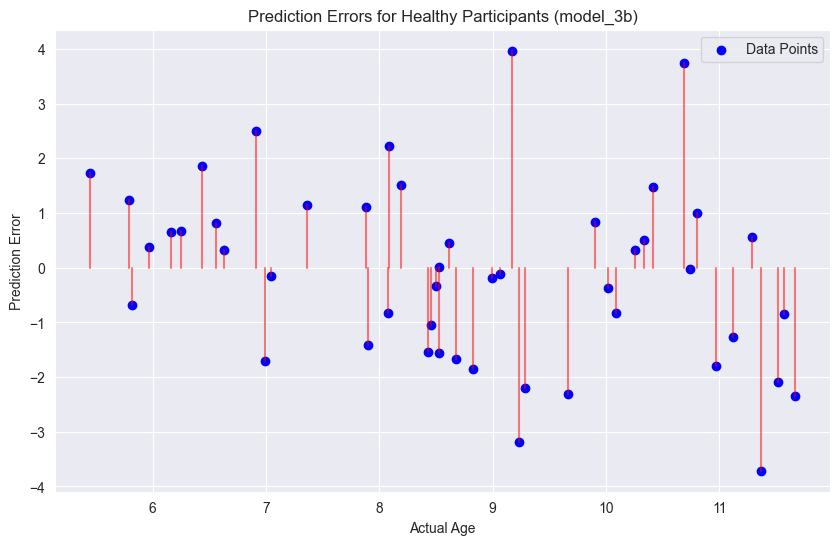

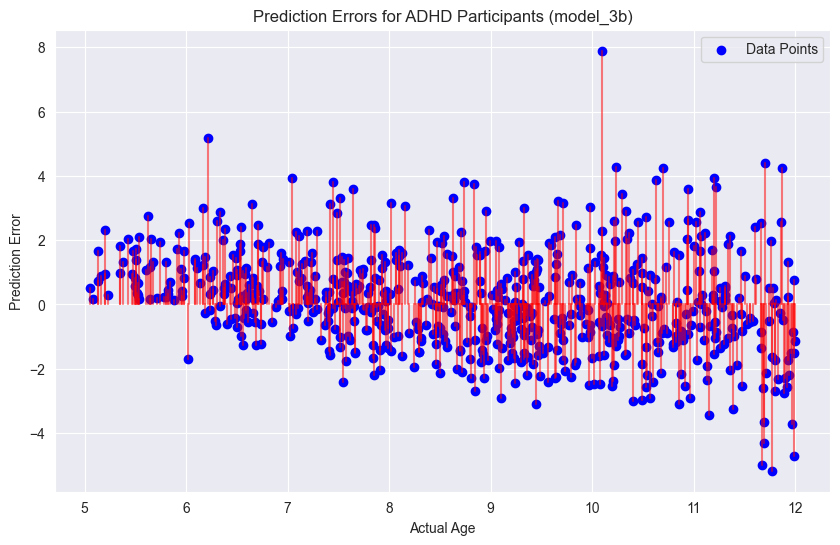

In [45]:
#model_3b
model = "model_3b"
def plot_lines(data, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['age'], data[model], label='Data Points', color='blue')

    for index, row in data.iterrows():
        plt.plot([row['age'], row['age']], [0, row['model_3b']], color='red', alpha=0.5)

    plt.title(title)
    plt.xlabel('Actual Age')
    plt.ylabel('Prediction Error')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_lines(df_healthy_test_error_young, 'Prediction Errors for Healthy Participants (model_3b)')

plot_lines(df_adhd_error_young, 'Prediction Errors for ADHD Participants (model_3b)')


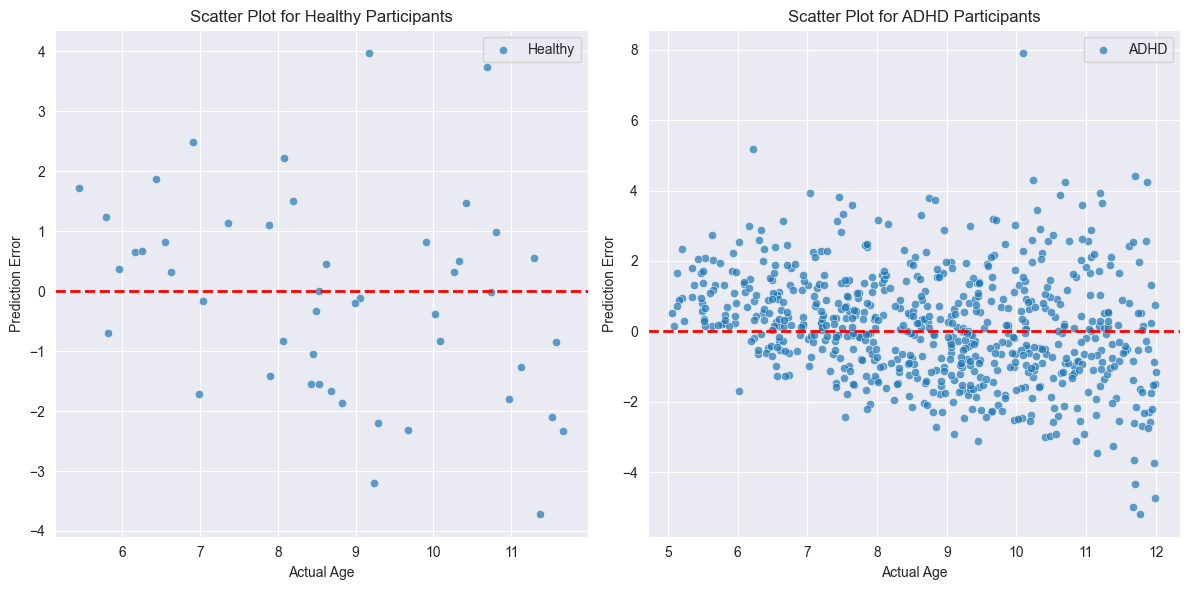

In [46]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y=model, data=df_healthy_test_error_young, label='Healthy', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Scatter Plot for Healthy Participants')
plt.xlabel('Actual Age')
plt.ylabel('Prediction Error')

plt.subplot(1, 2, 2)
sns.scatterplot(x='age', y=model, data=df_adhd_error_young, label='ADHD', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Scatter Plot for ADHD Participants')
plt.xlabel('Actual Age')
plt.ylabel('Prediction Error')

plt.tight_layout()
plt.show()


In [47]:
def calculate_error_percentage(data, model):
    total_samples = len(data)
    positive_errors = len(data[data[model] > 0])
    negative_errors = len(data[data[model] < 0])

    percentage_positive_errors = (positive_errors / total_samples) * 100
    percentage_negative_errors = (negative_errors / total_samples) * 100

    return percentage_positive_errors, percentage_negative_errors


percentage_positive_errors_healthy, percentage_negative_errors_healthy = calculate_error_percentage(df_healthy_test_error_young, model)

percentage_positive_errors_neuro, percentage_negative_errors_neuro = calculate_error_percentage(df_adhd_error_young, model)

print(f"\nHealthy Participants ({model}):")
print(f"Percentage of Positive Errors: {percentage_positive_errors_healthy:.2f}%")
print(f"Percentage of Negative Errors: {percentage_negative_errors_healthy:.2f}%")

print(f"\nADHD Participants ({model}):")
print(f"Percentage of Positive Errors: {percentage_positive_errors_neuro:.2f}%")
print(f"Percentage of Negative Errors: {percentage_negative_errors_neuro:.2f}%")



Healthy Participants (model_3b):
Percentage of Positive Errors: 47.92%
Percentage of Negative Errors: 52.08%

ADHD Participants (model_3b):
Percentage of Positive Errors: 53.01%
Percentage of Negative Errors: 46.99%


####

##### H0: The number of positive errors is equal to the number of negative errors.
##### HA: The number of positive errors is not equal to the number of negative errors (either consistently positive or consistently negative errors).

In [48]:
#https://vitalflux.com/sign-test-hypothesis-python-examples/
from scipy import stats

differences = df_adhd_error_young[model]
differences = differences[differences != 0]

n_pos = np.sum(differences > 0)
n_neg = np.sum(differences < 0)

n = np.min([n_pos, n_neg])
p_value = stats.binom_test(n, n=n_pos + n_neg, p=0.5, alternative='two-sided')

print(f"\n{model}")
print(f'p-value: {p_value}')

if p_value < 0.05:
    print("We reject the null hypothesis: prediction error is biased")
#alternative = less for potential negative bias
p_value_bias = stats.binom_test(n, n=n_pos + n_neg, p=0.5, alternative='less')
print(f'p-value-negative-bias: {p_value_bias}')
if p_value_bias < 0.05:
    print("We reject the null hypothesis: there is negative bias")

else:
    print("We fail to reject the null hypothesis: prediction error is un-biased")


model_3b
p-value: 0.12526194642793
p-value-negative-bias: 0.062630973213965
We fail to reject the null hypothesis: prediction error is un-biased


/var/folders/6n/8415mhqd08zdsytymttmckl80000gn/T/ipykernel_25621/2867707948.py:11: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test(n, n=n_pos + n_neg, p=0.5, alternative='two-sided')
/var/folders/6n/8415mhqd08zdsytymttmckl80000gn/T/ipykernel_25621/2867707948.py:19: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value_bias = stats.binom_test(n, n=n_pos + n_neg, p=0.5, alternative='less')


In [49]:
#sign test for healthy young
differences = df_healthy_test_error_young[model]
differences = differences[differences != 0]

n_pos = np.sum(differences > 0)
n_neg = np.sum(differences < 0)

n = np.min([n_pos, n_neg])
p_value = stats.binom_test(n, n=n_pos + n_neg, p=0.5, alternative='two-sided')

print(f"\n{model}")
print(f'p-value: {p_value}')

if p_value < 0.05:
    print("We reject the null hypothesis: prediction error is biased")
#alternative = less for potential negative bias
p_value_bias = stats.binom_test(n, n=n_pos + n_neg, p=0.5, alternative='less')
print(f'p-value-negative-bias: {p_value_bias}')
if p_value_bias < 0.05:
    print("We reject the null hypothesis: there is negative bias")

else:
    print("We fail to reject the null hypothesis: prediction error is un-biased")


model_3b
p-value: 0.8854334972865135
p-value-negative-bias: 0.4427167486432568
We fail to reject the null hypothesis: prediction error is un-biased


/var/folders/6n/8415mhqd08zdsytymttmckl80000gn/T/ipykernel_25621/665148721.py:9: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test(n, n=n_pos + n_neg, p=0.5, alternative='two-sided')
/var/folders/6n/8415mhqd08zdsytymttmckl80000gn/T/ipykernel_25621/665148721.py:17: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value_bias = stats.binom_test(n, n=n_pos + n_neg, p=0.5, alternative='less')
